In [1]:
import cv2
import dicom
from matplotlib import pyplot as plt
from multiprocessing import Pool
import numpy as np
from scipy.misc import imresize
import sys

%matplotlib inline

In [42]:
from skimage import measure, feature

In [3]:
plt.set_cmap("gray")

In [4]:
IMAGE_SIZE = 64

In [5]:
data_file = np.load("../pickles/data.npz")
data_X = data_file["X"]
data_Y = data_file["y"]

In [6]:
orientations = np.load("../pickles/orientations.npz")["predicted"]

In [7]:
segmentations = np.load("../pickles/segmented.npz")["frontal"][:, :, :, 0]

In [8]:
X_front = data_X[orientations == "1", :, :]
Y_front = data_Y[orientations == "1"]

In [9]:
def proc_seg(args):
    i, seg = args
    lbl = measure.label(seg)
    areas = [np.sum(lbl == i) for i in range(np.unique(lbl).shape[0])]
    lbl_areas = sorted(list(zip(range(np.unique(lbl).shape[0]), areas)), key=lambda l: l[1], reverse=True)
    lbl_areas = [l for l in lbl_areas if l[0] != 0]
#     print(lbl_areas)

    if len(lbl_areas) < 2:
        print("There are less than two connected components. i = {}".format(i))
        return
    
    if np.exp(np.abs(np.log(lbl_areas[0][1]) - np.log(lbl_areas[1][1]))) > 2.5:
        print("The first two connected components have very different areas. i = {}".format(i))
        return
    
    if len(lbl_areas) >= 3:
        if np.exp(np.abs(np.log(lbl_areas[1][1]) - np.log(lbl_areas[2][1]))) < 5:
            print("The second and the third connected components have similar areas. i = {}".format(i))
            return
    
    wh0 = np.where(lbl == lbl_areas[0][0])
    wh1 = np.where(lbl == lbl_areas[1][0])
    
    if wh0[1].mean() > wh1[1].mean():
        return (lbl == lbl_areas[1][0], lbl == lbl_areas[0][0])
    else:
        return (lbl == lbl_areas[0][0], lbl == lbl_areas[1][0])

#     return (lbl == lbl_areas[1][0], lbl == lbl_areas[0][0])

In [10]:
clean_segs = []

bad_images = []

with Pool(50) as p:
    for i, r in enumerate(p.imap(proc_seg, enumerate(segmentations > 0.5), chunksize=5)):
        sys.stderr.write("\r{0:2%}".format(i / (len(segmentations))))
        if r is None:
            bad_images.append(i)
        else:
            clean_segs.append(r)

The first two connected components have very different areas. i = 0
The first two connected components have very different areas. i = 187


2.202412%

The first two connected components have very different areas. i = 211


2.464604%

The first two connected components have very different areas. i = 98
The first two connected components have very different areas. i = 375
The first two connected components have very different areas. i = 366
The first two connected components have very different areas. i = 392
The first two connected components have very different areas. i = 254
The first two connected components have very different areas. i = 432


6.528579%

There are less than two connected components. i = 468


8.101730%

The first two connected components have very different areas. i = 610
The first two connected components have very different areas. i = 562
The first two connected components have very different areas. i = 591
The first two connected components have very different areas. i = 567
The first two connected components have very different areas. i = 621


12.427897%

The first two connected components have very different areas. i = 579
The second and the third connected components have similar areas. i = 592
The first two connected components have very different areas. i = 638
The second and the third connected components have similar areas. i = 649


13.083377%

The first two connected components have very different areas. i = 707
The second and the third connected components have similar areas. i = 726
The second and the third connected components have similar areas. i = 667
The first two connected components have very different areas. i = 713
The first two connected components have very different areas. i = 752


14.787625%

The first two connected components have very different areas. i = 694
The first two connected components have very different areas. i = 749
The second and the third connected components have similar areas. i = 758


15.443104%

The second and the third connected components have similar areas. i = 812
The first two connected components have very different areas. i = 900


17.409544%

The first two connected components have very different areas. i = 925
The first two connected components have very different areas. i = 891


19.507079%

The first two connected components have very different areas. i = 903
The first two connected components have very different areas. i = 985
The first two connected components have very different areas. i = 960


19.769271%

The first two connected components have very different areas. i = 953
The first two connected components have very different areas. i = 996
The second and the third connected components have similar areas. i = 959
The first two connected components have very different areas. i = 975


21.211327%

The first two connected components have very different areas. i = 898
The second and the third connected components have similar areas. i = 980
The first two connected components have very different areas. i = 1054
The first two connected components have very different areas. i = 1017


22.915574%

The first two connected components have very different areas. i = 976
The first two connected components have very different areas. i = 1086
The second and the third connected components have similar areas. i = 1112


23.177766%

The first two connected components have very different areas. i = 1150
The first two connected components have very different areas. i = 1018
The first two connected components have very different areas. i = 977


25.144206%

The first two connected components have very different areas. i = 1139
The first two connected components have very different areas. i = 1222


25.537493%

The first two connected components have very different areas. i = 1178
The first two connected components have very different areas. i = 1251
The first two connected components have very different areas. i = 1275
The second and the third connected components have similar areas. i = 1280
The first two connected components have very different areas. i = 1295
The first two connected components have very different areas. i = 1330
The first two connected components have very different areas. i = 1239
The second and the third connected components have similar areas. i = 1311
The first two connected components have very different areas. i = 1320
The second and the third connected components have similar areas. i = 1338
The first two connected components have very different areas. i = 1293
The first two connected components have very different areas. i = 1358


30.125852%

The first two connected components have very different areas. i = 1313
The second and the third connected components have similar areas. i = 1279


32.354483%

The first two connected components have very different areas. i = 1450
The first two connected components have very different areas. i = 1480


33.403251%

The first two connected components have very different areas. i = 1409
The first two connected components have very different areas. i = 1457
The second and the third connected components have similar areas. i = 1462
The first two connected components have very different areas. i = 1443
The first two connected components have very different areas. i = 1527


34.320923%

The first two connected components have very different areas. i = 1543
The first two connected components have very different areas. i = 1502
The second and the third connected components have similar areas. i = 1558
The first two connected components have very different areas. i = 1596
The first two connected components have very different areas. i = 1548
The first two connected components have very different areas. i = 1576


36.418458%

The first two connected components have very different areas. i = 1636
The first two connected components have very different areas. i = 1493


37.729418%

The first two connected components have very different areas. i = 1602
The first two connected components have very different areas. i = 1619
The first two connected components have very different areas. i = 1673
The first two connected components have very different areas. i = 1683


39.040378%

The second and the third connected components have similar areas. i = 1795
The first two connected components have very different areas. i = 1644
The first two connected components have very different areas. i = 1722
The first two connected components have very different areas. i = 1727
The first two connected components have very different areas. i = 1743


41.924489%

The first two connected components have very different areas. i = 1816
The first two connected components have very different areas. i = 1729
The first two connected components have very different areas. i = 1880


42.973256%

The first two connected components have very different areas. i = 1829
The first two connected components have very different areas. i = 1862
The first two connected components have very different areas. i = 1835
The first two connected components have very different areas. i = 1892


45.070792%

The first two connected components have very different areas. i = 1858


45.201888%

The first two connected components have very different areas. i = 1873
The first two connected components have very different areas. i = 1996
The first two connected components have very different areas. i = 1909
The first two connected components have very different areas. i = 2010
The first two connected components have very different areas. i = 1899
The first two connected components have very different areas. i = 1987


47.954903%

The first two connected components have very different areas. i = 1972
The first two connected components have very different areas. i = 2002
The first two connected components have very different areas. i = 2050


48.085999%

The first two connected components have very different areas. i = 1977


49.003671%

The second and the third connected components have similar areas. i = 2122
The first two connected components have very different areas. i = 2079


51.756686%

The first two connected components have very different areas. i = 2175
The first two connected components have very different areas. i = 2165
The second and the third connected components have similar areas. i = 2156
The first two connected components have very different areas. i = 2186
The first two connected components have very different areas. i = 2125
The first two connected components have very different areas. i = 2183
The first two connected components have very different areas. i = 2173


53.723125%

The first two connected components have very different areas. i = 2227
The first two connected components have very different areas. i = 2123
The first two connected components have very different areas. i = 2256
The first two connected components have very different areas. i = 2296
The first two connected components have very different areas. i = 2291
The first two connected components have very different areas. i = 2124
The first two connected components have very different areas. i = 2282


55.558469%

The first two connected components have very different areas. i = 2297
The first two connected components have very different areas. i = 2292
The first two connected components have very different areas. i = 2392
The first two connected components have very different areas. i = 2358
The first two connected components have very different areas. i = 2417
The first two connected components have very different areas. i = 2437
The first two connected components have very different areas. i = 2401


59.753540%

The first two connected components have very different areas. i = 2467
The first two connected components have very different areas. i = 2460
The first two connected components have very different areas. i = 2520
The first two connected components have very different areas. i = 2545
The first two connected components have very different areas. i = 2477
The first two connected components have very different areas. i = 2502


61.719979%

The first two connected components have very different areas. i = 2469


62.899843%

The first two connected components have very different areas. i = 2479
The second and the third connected components have similar areas. i = 2666
The first two connected components have very different areas. i = 2584


64.472994%

The first two connected components have very different areas. i = 2735
The first two connected components have very different areas. i = 2684


66.046146%

The first two connected components have very different areas. i = 2810


69.192449%

The second and the third connected components have similar areas. i = 2761
The first two connected components have very different areas. i = 2783
The first two connected components have very different areas. i = 2804
The first two connected components have very different areas. i = 2856


70.241217%

The first two connected components have very different areas. i = 2885
The first two connected components have very different areas. i = 2920
The second and the third connected components have similar areas. i = 2847


72.338752%

The first two connected components have very different areas. i = 2931
The first two connected components have very different areas. i = 2967
The first two connected components have very different areas. i = 2908
The first two connected components have very different areas. i = 2904
The second and the third connected components have similar areas. i = 2985
The first two connected components have very different areas. i = 2991
The first two connected components have very different areas. i = 3010
The first two connected components have very different areas. i = 3032
The first two connected components have very different areas. i = 3046
The first two connected components have very different areas. i = 3040
The first two connected components have very different areas. i = 3075
The first two connected components have very different areas. i = 3011
The first two connected components have very different areas. i = 3086
The first two connected components have very different areas. i = 2992


74.567383%

The second and the third connected components have similar areas. i = 3087
The first two connected components have very different areas. i = 3120
The first two connected components have very different areas. i = 3082


76.140535%

The first two connected components have very different areas. i = 3180
The first two connected components have very different areas. i = 3116
The first two connected components have very different areas. i = 3150
The first two connected components have very different areas. i = 3014


78.238070%

The second and the third connected components have similar areas. i = 3123
The first two connected components have very different areas. i = 3177
The first two connected components have very different areas. i = 3145
The first two connected components have very different areas. i = 3117
The second and the third connected components have similar areas. i = 3172


78.369166%

The first two connected components have very different areas. i = 3217
The first two connected components have very different areas. i = 3282


80.597798%

The first two connected components have very different areas. i = 3306
The first two connected components have very different areas. i = 3325


81.646565%

The first two connected components have very different areas. i = 3314
The first two connected components have very different areas. i = 3342
The second and the third connected components have similar areas. i = 3299
The first two connected components have very different areas. i = 3396
The second and the third connected components have similar areas. i = 3274


84.268485%

The first two connected components have very different areas. i = 3353
The second and the third connected components have similar areas. i = 3441
The first two connected components have very different areas. i = 3471


85.710540%

The first two connected components have very different areas. i = 3447
The first two connected components have very different areas. i = 3437
The first two connected components have very different areas. i = 3550
The second and the third connected components have similar areas. i = 3515
The first two connected components have very different areas. i = 3439
The first two connected components have very different areas. i = 3482


88.987939%

The first two connected components have very different areas. i = 3606
The first two connected components have very different areas. i = 3636


90.036707%

The second and the third connected components have similar areas. i = 3568
The first two connected components have very different areas. i = 3608


91.216571%

The first two connected components have very different areas. i = 3745
The second and the third connected components have similar areas. i = 3648


92.134242%

The second and the third connected components have similar areas. i = 3725
The first two connected components have very different areas. i = 3771
The second and the third connected components have similar areas. i = 3678
The first two connected components have very different areas. i = 3791
The first two connected components have very different areas. i = 3749
The first two connected components have very different areas. i = 3813


99.973781%

In [11]:
X_frontal = X_front[[i for i in range(len(X_front)) if i not in bad_images], :, :]
Y_frontal = Y_front[[i for i in range(len(X_front)) if i not in bad_images]]

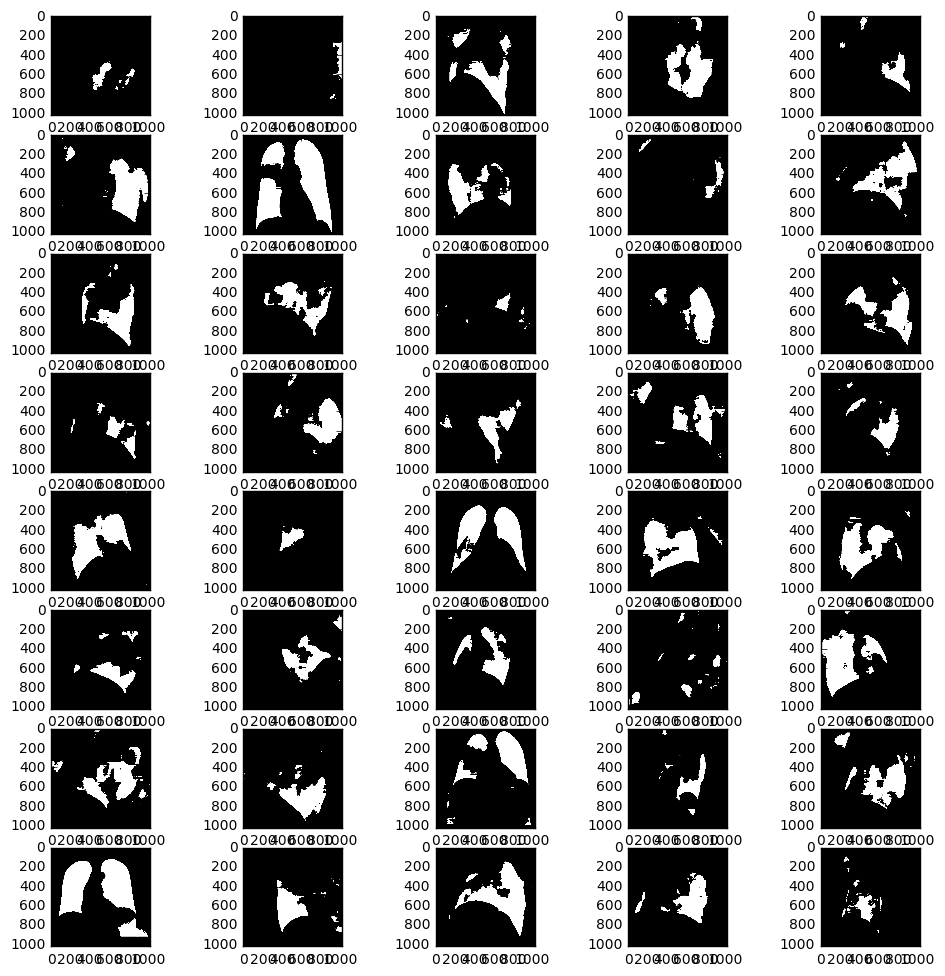

In [18]:
fig = plt.figure(figsize=(12, 12))

for i in range(40, 80):
    n = i - 40
    fig.add_subplot(8, 5, n + 1)
    plt.imshow(segmentations[bad_images[i]] > 0.5)

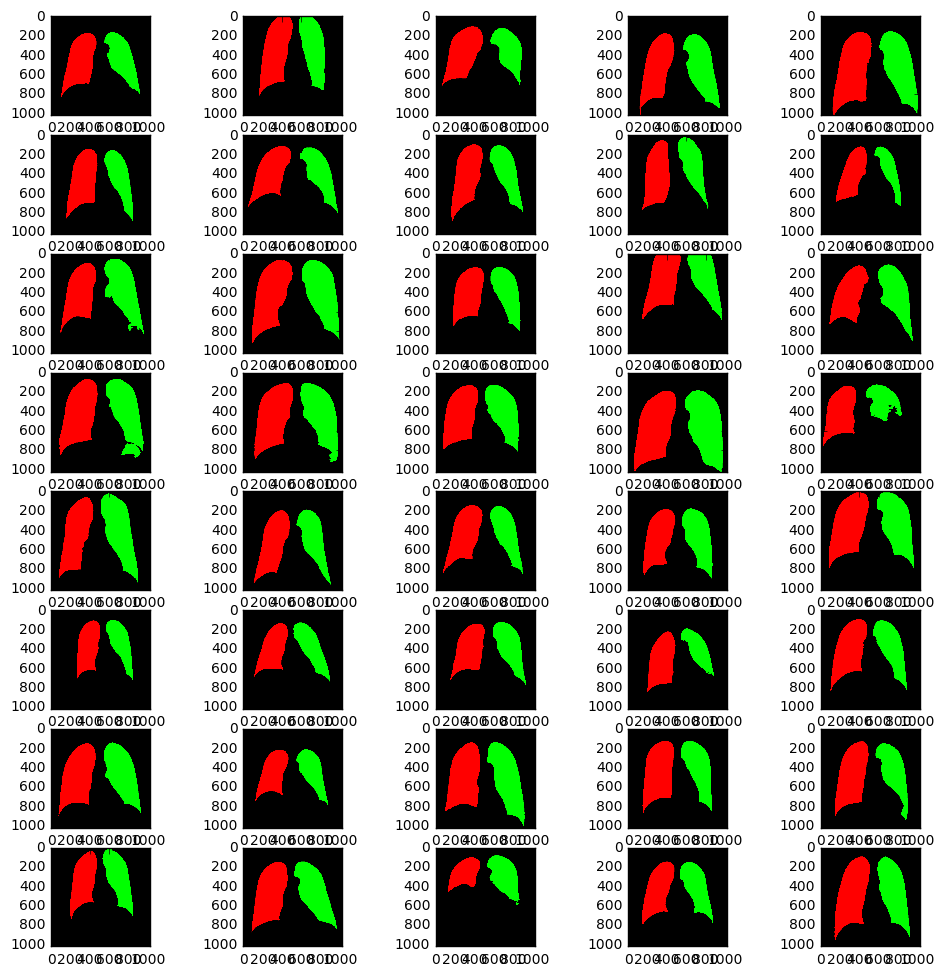

In [58]:
fig = plt.figure(figsize=(12, 12))

for i in range(40):
    n = i
    fig.add_subplot(8, 5, n + 1)
    plt.imshow(np.concatenate([clean_segs[i][0][:, :, None], 
                               clean_segs[i][1][:, :, None], 
                               np.zeros_like(clean_segs[i][0][:, :, None])], axis=2))

In [12]:
def get_bbox(clean_seg):
    right, left = clean_seg
    leftmost = np.where(right)[1].min()
    rightmost = np.where(left)[1].max()
    
    toppest = np.concatenate([np.where(right)[0], np.where(left)[0]]).min()
    bottomest = np.concatenate([np.where(right)[0], np.where(left)[0]]).max()
    
    return ((leftmost, toppest), (rightmost, bottomest))

In [13]:
def get_mediastinum_bbox(clean_seg):
    right, left = clean_seg

    rightmost_ = np.where(left)[1].min()
    leftmost_ = np.where(right)[1].max()
    center = (rightmost_ + leftmost_) // 2

    leftmost = leftmost_ - 2 * (center - leftmost_)
    rightmost = rightmost_ + 2 * (rightmost_ - center)
    toppest = np.concatenate([np.where(right)[0], np.where(left)[0]]).min()
    bottomest = np.concatenate([np.where(right)[0], np.where(left)[0]]).max()

    return ((leftmost, toppest), (rightmost, bottomest))

In [14]:
i = 5
b1 = get_bbox(clean_segs[i])
b2 = get_mediastinum_bbox(clean_segs[i])

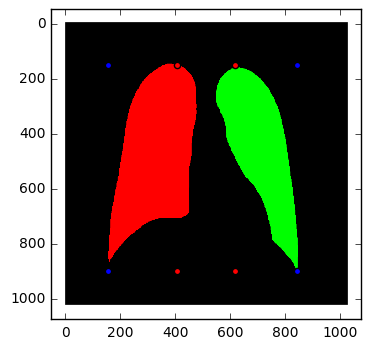

In [15]:
plt.imshow(np.concatenate([clean_segs[i][0][:, :, None], 
                           clean_segs[i][1][:, :, None], 
                           np.zeros_like(clean_segs[i][0][:, :, None])], axis=2))


plt.scatter([b1[0][0], b1[0][0], b1[1][0], b1[1][0]], [b1[0][1], b1[1][1], b1[0][1], b1[1][1]])
plt.scatter([b2[0][0], b2[0][0], b2[1][0], b2[1][0]], [b2[0][1], b2[1][1], b2[0][1], b2[1][1]], c="r")

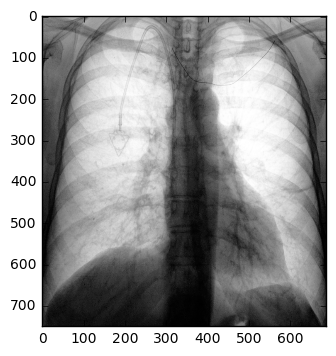

In [16]:
lung_img = cv2.equalizeHist(X_frontal[i][b1[0][1]:b1[1][1], b1[0][0]:b1[1][0]])
plt.imshow(lung_img)

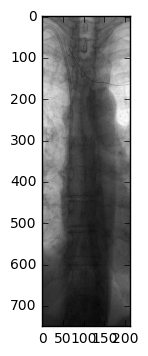

In [17]:
med_img = X_frontal[i][b2[0][1]:b2[1][1], b2[0][0]:b2[1][0]]
plt.imshow(med_img)

In [63]:
res = feature.hog(lung_img_dw, visualise=True, orientations=6)

In [64]:
res[0].shape

(10584,)

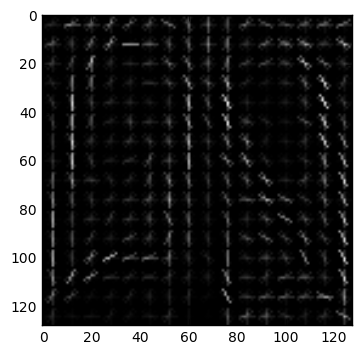

In [65]:
plt.imshow(res[1])

In [40]:
lung_img_dw = imresize(lung_img, [128, 128])

winSize = (32,32)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, 
                        cellSize, nbins, derivAperture,
                        winSigma, histogramNormType, L2HysThreshold,
                        gammaCorrection, nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(lung_img_dw, winStride, padding, locations)

In [41]:
hist.shape

(324, 1)

In [37]:
hist.max()

0.32601452

In [18]:
lung_img_dw = imresize(lung_img, [128, 128])

descriptor = cv2.HOGDescriptor()
desc = descriptor.compute(lung_img_dw, (16, 16), )

In [34]:
lung_img_dw[:64, :64]

array([[150, 148, 148, ..., 105, 114, 144],
       [130, 128, 128, ..., 110, 118, 150],
       [125, 122, 119, ...,  97, 103, 127],
       ..., 
       [ 68,  67,  61, ...,  76,  80,  73],
       [ 71,  64,  60, ...,  73,  72,  65],
       [ 72,  63,  57, ...,  72,  75,  69]], dtype=uint8)

In [33]:
lung_img_dw

array([[150, 148, 148, ..., 189, 187, 187],
       [130, 128, 128, ..., 162, 160, 158],
       [125, 122, 119, ..., 141, 140, 140],
       ..., 
       [ 32,  35,  20, ...,  62,  37,  18],
       [ 35,  33,  22, ...,  58,  34,  16],
       [ 44,  33,  24, ...,  43,  33,  15]], dtype=uint8)

In [28]:
desc.shape

(94500, 1)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

kp1, des1 = surf.detectAndCompute(lung_img_dw[:64, :64], None)

In [191]:
[kp.pt for kp in kp1]

[(30.6292667388916, 17.374135971069336),
 (23.157033920288086, 20.203048706054688),
 (13.660307884216309, 49.26004409790039),
 (17.647855758666992, 34.328330993652344),
 (16.49400520324707, 34.34039306640625),
 (24.250198364257812, 43.78665542602539),
 (47.08380889892578, 18.163959503173828),
 (11.449992179870605, 41.3528938293457),
 (43.30831527709961, 29.22700309753418),
 (17.80901336669922, 46.27509689331055),
 (41.2886848449707, 41.66065979003906),
 (15.641732215881348, 26.047578811645508),
 (14.222992897033691, 16.97078514099121)]

In [167]:
kp1

[<KeyPoint 0x7f6ebf581450>,
 <KeyPoint 0x7f6ebf5814b0>,
 <KeyPoint 0x7f6ebf581390>,
 <KeyPoint 0x7f6ebf581690>]

In [150]:
med_img.shape

(750, 213)

In [159]:
dir(kp1[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'angle',
 'class_id',
 'octave',
 'pt',
 'response',
 'size']

In [164]:
kp1[0].pt

(440.0531311035156, 248.0837860107422)

In [165]:
kp1[1].pt

(194.8229217529297, 232.20004272460938)

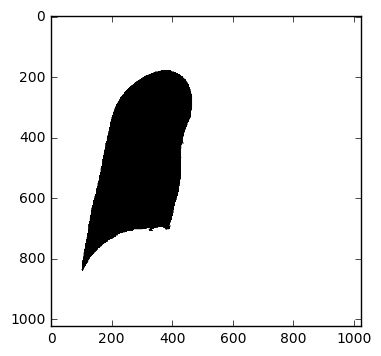

In [64]:
plt.imshow(right[:, 1:] == 0)

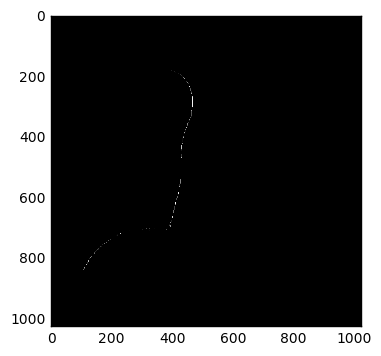

In [61]:
right, left = clean_segs[0]
plt.imshow(np.logical_and(right[:, :-1] == 1, right[:, 1:] == 0))

In [4]:
img_1 = \
cv2.equalizeHist(
    imresize(
        dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1/1_IM-0001-4001.dcm").pixel_array, 
        [IMAGE_SIZE, IMAGE_SIZE]
    )
)

img_2 = \
cv2.equalizeHist(
    imresize(
        dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/2/2_IM-0652-1001.dcm").pixel_array,
        [IMAGE_SIZE, IMAGE_SIZE]
    )
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/a.kondyukov/data/Indianapolis_dicom/1/1_IM-0001-4001.dcm'

In [32]:
%%time

sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

kp1, des1 = sift.detectAndCompute(img_1, None)
kp2, des2 = sift.detectAndCompute(img_2, None)

# kp1, des1 = surf.detectAndCompute(img_1, None)
# kp2, des2 = surf.detectAndCompute(img_2, None)

CPU times: user 2.54 s, sys: 517 ms, total: 3.05 s
Wall time: 788 ms


In [33]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, 10)
# matches = sorted(matches, key = lambda x: x.distance)

# Apply ratio test
good = []
for ms in matches:
    if ms[0].distance < .9 * ms[1].distance:
        good.append([ms[0]])

img3 = cv2.drawMatchesKnn(img_1, kp1, img_2, kp2, good[:10], flags=2, outImg=img_2)

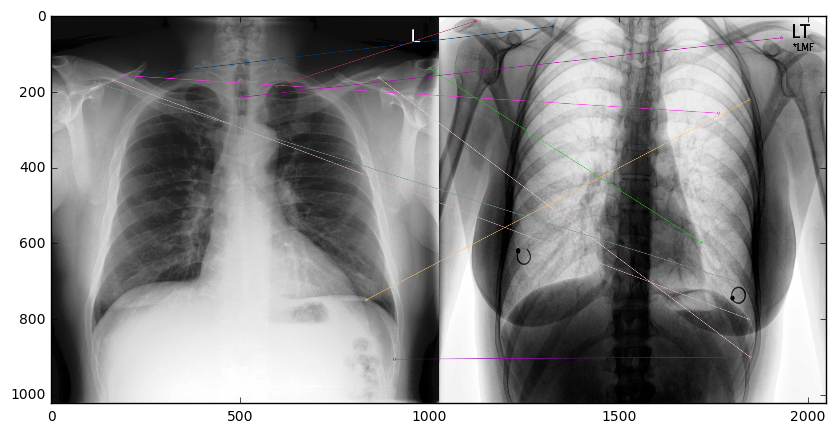

In [36]:
plt.figure(figsize=(10, 10))

plt.imshow(img3)

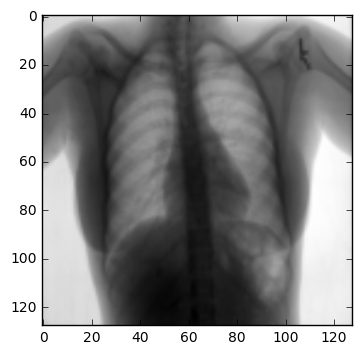

In [20]:
plt.imshow(tmp_img)